In [1]:
# import dependencies
using Polyhedra
using GLPK
using JuMP
using Plots
using LinearAlgebra

In [5]:
# choose a system to run
# System 1
A = [0.7776 -0.0045; 26.6185 1.8555];
B = [-0.0004; 0.2907];
K = [-84.5145 -6.3997];
#K = [-0.6609 -1.3261];
S = A + B * K
@show S
eigvals(S)

S = [0.8114058 -0.0019401199999999996; 2.050134849999999 -0.004892790000000202]


2-element Vector{Float64}:
 9.261508100614525e-6
 0.8065037484918991

In [2]:
# choose a system to run
# system 2
A = [1 1; 0 1];
B = [0.5; 1];
K = [-0.6609 -1.3261];
S = A + B * K
@show S
eigvals(S)

S = [0.66955 0.33694999999999997; -0.6609 -0.32610000000000006]


2-element Vector{Float64}:
 0.013170669800537993
 0.330279330199462

In [3]:
@show Wv = vrep([[x, y] for x in [-1, 1] for y in [-1,1]]) # put the disturbance boundaries here
lib = DefaultLibrary{Float64}(GLPK.Optimizer)
@show W = polyhedron(Wv, lib)
function Fs(s::Integer, verbose=1)
    @assert s ≥ 1
    F = W
    A_W = W
    for i in 1:(s-1)
        A_W = S * A_W
        F += A_W
        if verbose ≥ 1
            println("Number of points after adding A^$i * W: ", npoints(F))
        end
        removevredundancy!(F)
        if verbose ≥ 1
            println("Number of points after removing redundant ones: ", npoints(F))
        end
    end
    return F
end

Wv = vrep([[x, y] for x = [-1, 1] for y = [-1, 1]]) = convexhull([-1, -1], [-1, 1], [1, -1], [1, 1])
W = polyhedron(Wv, lib) = convexhull([-1.0, -1.0], [-1.0, 1.0], [1.0, -1.0], [1.0, 1.0])


Fs (generic function with 2 methods)

In [4]:
@time Fs(10) # run to get the vertices of the polygon
# the vertices are put into make_RPI_set.m to make the polygon in matlab

Number of points after adding A^1 * W: 16
Number of points after removing redundant ones: 8
Number of points after adding A^2 * W: 32
Number of points after removing redundant ones: 12
Number of points after adding A^3 * W: 48
Number of points after removing redundant ones: 16
Number of points after adding A^4 * W: 64
Number of points after removing redundant ones: 18
Number of points after adding A^5 * W: 72
Number of points after removing redundant ones: 18
Number of points after adding A^6 * W: 72
Number of points after removing redundant ones: 18
Number of points after adding A^7 * W: 72
Number of points after removing redundant ones: 18
Number of points after adding A^8 * W: 72
Number of points after removing redundant ones: 18
Number of points after adding A^9 * W: 72
Number of points after removing redundant ones: 18
  3.620696 seconds (9.35 M allocations: 608.352 MiB, 5.26% gc time, 99.37% compilation time)


Polyhedron DefaultPolyhedron{Float64, Polyhedra.Intersection{Float64, Vector{Float64}, Int64}, Polyhedra.Hull{Float64, Vector{Float64}, Int64}}:
18-element iterator of Vector{Float64}:
 [0.5162691080984935, -2.499927257828653]
 [-0.15763089190150648, -1.8477272578286534]
 [-1.496730891901506, -0.5259272578286533]
 [-1.7281818469015062, -0.29322916782865344]
 [-2.1793957419015064, 0.16074304217134647]
 [-2.2679541659194067, 0.24990682370091913]
 [-2.4170984931571566, 0.40007374922541916]
 [-2.5162691080984936, 0.49992725782865355]
 [-2.5162691080984936, 2.499927257828653]
 [-0.5162691080984935, 2.499927257828653]
 [0.15763089190150648, 1.8477272578286534]
 [1.496730891901506, 0.5259272578286533]
 [1.7281818469015062, 0.29322916782865344]
 [2.1793957419015064, -0.16074304217134647]
 [2.2679541659194067, -0.24990682370091913]
 [2.4170984931571566, -0.40007374922541916]
 [2.5162691080984936, -0.49992725782865355]
 [2.5162691080984936, -2.499927257828653]

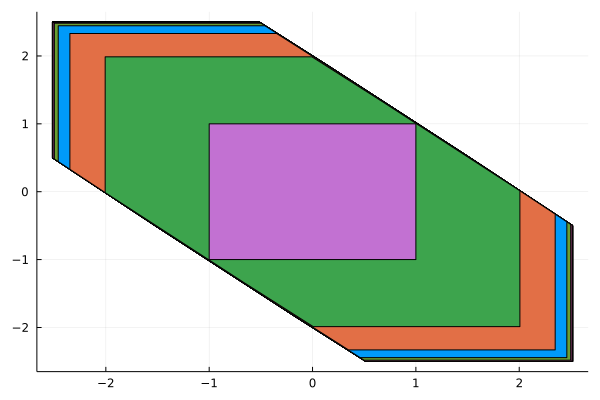

In [5]:
# run to visualize the polygon
plot()
for i in 20:-1:1
    plot!(Fs(i, 0))
end
plot!()